In [20]:
import numpy as np
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
filename = "../data/iris/iris.data"

import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory:", cwd)

urllib.request.urlretrieve(url, filename)

with open("../data/iris/iris.data") as f:
    lines = [i[:-1] for i in f.readlines()]

n = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
x = [n.index(i.split(",")[-1]) for i in lines if i != ""] 
x = np.array(x, dtype="uint8")


Current working directory: /mnt/batch/tasks/shared/LS_root/mounts/clusters/alkampfer1/code/Users/alkampfer/PracticalDeepLearningPython/chapter_05


Sure! 

In the code snippet you provided, `n` is a list of the three possible classes of iris flowers: "Iris-setosa", "Iris-versicolor", and "Iris-virginica". 

`lines` is a list of strings, where each string represents a line in the iris.data file. Each line contains four measurements (sepal length, sepal width, petal length, and petal width) for an iris flower, followed by the class of the flower.

The line you selected is a list comprehension that iterates over each line in `lines` and extracts the class of the iris flower. Specifically, it does the following:

- `i.split(",")[-1]` splits the line by commas and selects the last element, which is the class of the iris flower.
- `n.index(...)` finds the index of the class in the `n` list. For example, if the class is "Iris-setosa", this will return 0.
- The resulting index is added to the `x` list.

So, the `x` list contains an integer representation of the class of each iris flower in the dataset. For example, if the class of the first flower is "Iris-setosa", then `x[0]` will be 0.

In [21]:
print(x)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [23]:

y = [[float(j) for j in i.split(",")[:-1]] for i in lines if i != ""] 
y = np.array(y)
print("Shape of y: {}".format(y.shape))
print(y[:7])

Shape of y: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]


In [24]:

i = np.argsort(np.random.random(x.shape[0]))


This line of code generates a random permutation of the indices of the `x` array. 

`np.random.random(x.shape[0])` generates an array of random numbers between 0 and 1 with the same length as the number of rows in `x`. 

`np.argsort(...)` returns the indices that would sort the array in ascending order. Since we want a random permutation, we pass the array of random numbers to `np.argsort` instead of `x`. 

The resulting array of indices is a random permutation of the indices of the `x` array. This permutation is used to shuffle the rows of both the `x` and `y` arrays, so that the data is randomly ordered.

In [26]:
x = x[i]
y = y[i]

np.save("../data/iris_features.npy", y)
np.save("../data/iris_labels.npy", x)
print(i)


[ 97  55  90 144 115 138  22  83  61  86   5  65  34  85  45 104  96  66
  70 113  53  60  37 110  79  62 127  98   4  42   6 118  89 103 111 121
  81  19  26 136  23   0  67   1  18  28 106 100  46  87 119  35  56  58
  77  54  68  84  10  93 116  71 120 145  78  12  25  72  51 147  99 102
 132   9  24   2 135  39 148  43  76  16 133  11  48  57   8   3  73  47
  95  69 114  74 129  64 107  63  17  59  80 137 146  88 117 123  49 134
  14 142  36  40  29 108 130 125   7  44 128 124  30 122  13  50 126  21
  31  20 140  91 112  94 109  41 141 105  15  82 131  27  75  33 149  38
  52 139 101  32  92 143]


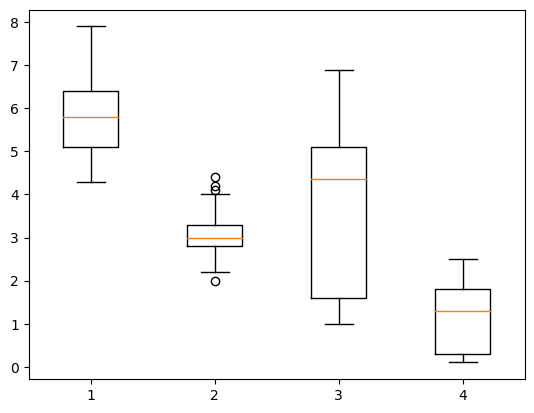

In [8]:
# plot y with mathplotlib and boxplot

import matplotlib.pyplot as plt
plt.boxplot(y)
plt.show()


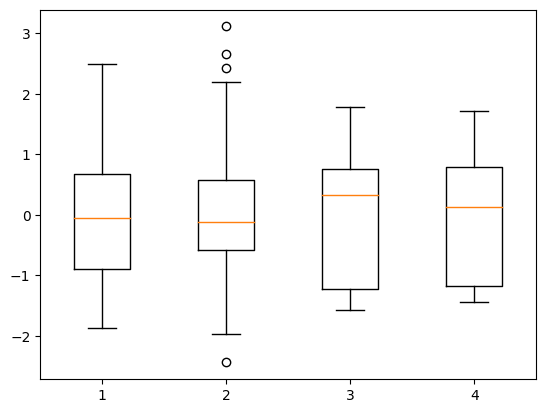

In [9]:
import numpy as np
# for y calculate mean, median, standard deviation and normalize the data
# Calculate mean, median, and standard deviation of y
y_mean = np.mean(y, axis=0)
y_median = np.median(y, axis=0)
y_std = np.std(y, axis=0)

# Normalize y
y_norm = (y - y_mean) / y_std

# plot y_norm
plt.boxplot(y_norm)
plt.show()


The reason for using `N-1` instead of `N` in the denominator of the formula for the sample standard deviation is to correct for bias in the estimate of the population standard deviation.

When we calculate the sample standard deviation, we are using a sample of `N` observations to estimate the population standard deviation. However, because we are using a sample instead of the entire population, our estimate of the standard deviation is likely to be slightly lower than the true population standard deviation. This is known as bias.

To correct for this bias, we divide by `N-1` instead of `N` in the denominator of the formula. This is known as Bessel's correction. By dividing by `N-1`, we are effectively using a slightly larger denominator, which increases the value of the standard deviation estimate and corrects for the bias.

In practice, the difference between using `N` and `N-1` in the denominator is usually small, especially for large sample sizes. However, for small sample sizes, the difference can be significant, and it is important to use `N-1` to obtain an unbiased estimate of the population standard deviation.

The `np.std` function calculates the standard deviation of an array along a specified axis. The formula for the sample standard deviation is:



In [ ]:
s = sqrt(sum((x - x_mean)**2) / (n - 1))



where `x` is the array of values, `x_mean` is the mean of the values, `n` is the number of values, and `sqrt` is the square root function.

The `np.std` function calculates the sample standard deviation by default, which means that it divides by `n-1` instead of `n`. However, you can change this behavior by setting the `ddof` (degrees of freedom) parameter to a different value. For example, setting `ddof=0` would calculate the population standard deviation instead of the sample standard deviation.

In [25]:
# calculate and print median, mean value, standard deviation of y_norm
y_norm_mean = np.mean(y_norm, axis=0)
y_norm_median = np.median(y_norm, axis=0)
y_norm_std = np.std(y_norm, axis=0)

print("Mean: {}".format(y_norm_mean))
print("Median: {}".format(y_norm_median))
print("Standard Deviation: {}".format(y_norm_std))


Mean: [ 3.85173375e-15 -1.65053156e-15 -7.66423961e-16 -4.60187444e-16]
Median: [-0.05250608 -0.1249576   0.33626586  0.13322594]
Standard Deviation: [1. 1. 1. 1.]


The reason for using `N-1` instead of `N` in the denominator of the formula for the sample standard deviation is to correct for bias in the estimate of the population standard deviation.

When we calculate the sample standard deviation, we are using a sample of `N` observations to estimate the population standard deviation. However, because we are using a sample instead of the entire population, our estimate of the standard deviation is likely to be slightly lower than the true population standard deviation. This is known as bias.

To correct for this bias, we divide by `N-1` instead of `N` in the denominator of the formula. This is known as Bessel's correction. By dividing by `N-1`, we are effectively using a slightly larger denominator, which increases the value of the standard deviation estimate and corrects for the bias.

In practice, the difference between using `N` and `N-1` in the denominator is usually small, especially for large sample sizes. However, for small sample sizes, the difference can be significant, and it is important to use `N-1` to obtain an unbiased estimate of the population standard deviation.